Importing the Dependencies


In [293]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


Data Collection & Analysis


In [296]:
# Loading the data from csv file to a pandas Dataframe
parkinson = pd.read_csv('Downloads/parkinsons [MConverter.eu].csv')


In [297]:
#Printing the first 5 rows of the Dataframe
parkinson.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [299]:
status_1_rows = parkinson[parkinson['status'] == 1].head(3)
status_0_rows = parkinson[parkinson['status'] == 0].head(2)

# Print datasets
print("Status 1 Dataset:\n", status_1_rows)
print("\nStatus 0 Dataset:\n", status_0_rows)


Status 1 Dataset:
              name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.33559

In [300]:
#number of rows and columns in the dataframe
parkinson.shape


(195, 24)

In [301]:
# checking for missing values in each column
parkinson.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [303]:
parkinson.duplicated().sum()


0

In [304]:
# getting the more information about the dataset
parkinson.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [305]:
# getting some statistical measures about the data
parkinson.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [306]:
# distribution of target variable
parkinson['status'].value_counts()


status
1    147
0     48
Name: count, dtype: int64

1 -> Parkinson's Positive
0 -> Healthy

In [308]:
# grouping the data based on the target variable
parkinson.groupby('status').mean(numeric_only=True)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

In [310]:
# Define features (x) and target (y)
x = parkinson.drop(['status', 'name'], axis=1)  # Features
y = parkinson['status']  # Target variable


In [311]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [312]:
print(y)


0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data into training and testing data

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [315]:
x_train


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
135,110.453,127.611,105.554,0.00494,0.00004,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
122,138.190,203.522,83.340,0.00704,0.00005,0.00406,0.00398,0.01218,0.04479,0.441,...,0.03220,0.07761,0.01968,18.305,0.538016,0.741480,-5.418787,0.160267,2.090438,0.229892
167,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
85,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.02877,0.06321,0.02782,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,155.078,163.736,144.148,0.00168,0.00001,0.00068,0.00092,0.00204,0.01064,0.097,...,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
14,152.845,163.305,75.836,0.00294,0.00002,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
92,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,...,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730


Data Standardization

In [317]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [318]:
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)


In [320]:
x_train


array([[-0.80172872, -0.70830513, -0.10603303, ...,  0.89854281,
        -0.48294197,  1.64980971],
       [-1.04374224, -0.74950432, -0.29919921, ...,  1.17531845,
         0.65177741,  0.26864313],
       [-0.3790498 ,  0.13122544, -0.82039362, ..., -0.7771489 ,
        -0.73102398,  0.28542547],
       ...,
       [-0.13744368, -0.31583967,  0.56292775, ..., -1.65126173,
        -0.08248373, -0.17764131],
       [-0.14053505, -0.42034011,  0.39263744, ...,  0.19569946,
         1.19665768, -0.11105606],
       [-0.35427092,  4.57536567, -1.22354854, ...,  0.55494177,
         0.80279984,  2.57800238]])

In [322]:
# Define pipeline with feature scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC())
])


In [323]:
# Define hyperparameter grid
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto']
}


In [324]:
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [325]:
# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Accuracy: 0.9102822580645162


In [326]:
# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=100))])

In [327]:
# Evaluate model on test set
y_pred = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9230769230769231


In [328]:
best_svm = grid_search.best_estimator_


In [329]:
y_pred = best_svm.predict(x_test)


In [330]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



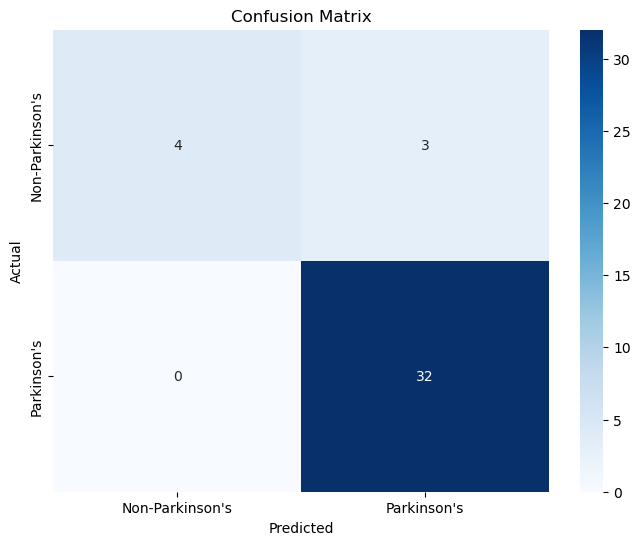

In [331]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Parkinson\'s', 'Parkinson\'s'], 
            yticklabels=['Non-Parkinson\'s', 'Parkinson\'s'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [332]:
x_train[32]


array([-0.89446982, -0.70889684, -0.15840118,  0.84008445,  1.26923684,
        0.68272544,  1.46243812,  0.68366644,  1.1203332 ,  0.94675269,
        1.10463724,  1.59542236,  0.63707888,  1.10433286, -0.27995545,
       -0.27594148, -0.62662393,  1.88854211,  1.17370307,  1.04411765,
       -0.08778908,  1.38158028])

In [333]:
x_train[25]

array([ 0.72006396,  0.05018452,  1.14193358, -0.67812803, -0.89559516,
       -0.59903807, -0.65783776, -0.59808289, -0.77976762, -0.7476454 ,
       -0.79181908, -0.72626264, -0.67523399, -0.79183614, -0.52264246,
        0.95114717, -1.79818153,  0.67883476, -1.16315661, -1.94608036,
       -0.0385594 , -0.93256936])

In [334]:
svm = SVC()
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
accuracy_score(y_test,y_predict)
input_data = (1.03983688,  0.17237666,  1.67879945, -0.83410268, -0.94428847,
       -0.73207722, -0.75558996, -0.73211087, -0.93702927, -0.90522785,
       -0.94302224, -0.83727105, -0.87945488, -0.94333241, -0.59315683,
        1.97537236, -0.29114466,  0.35627085, -1.24057161, -0.59088115,
       -2.2231008 , -1.20119397)

np_data = np.asanyarray(input_data)
prediction = svm.predict(np_data.reshape(1,-1))

if prediction == 1:
    print("This person has parkinson disease")
else:
    print("This person has no parkinson disease")
    

This person has no parkinson disease


In [374]:
svm = SVC()
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
accuracy_score(y_test,y_predict)
input_data = (1.63239631, -0.02731081, -0.87985049,  0.36806203,  0.14406765,
        0.49280653,  0.30476869,  0.49170115, -0.3137565 , -0.32592164,
       -0.25848708, -0.23791175, -0.33873289, -0.25879402, -0.2113724 ,
       -0.61257363,  0.87112118,  0.24786644,  0.19888239, -0.97586547,
       -0.55160318,  0.07769494)

np_data = np.asanyarray(input_data)
prediction = svm.predict(np_data.reshape(1,-1))

if prediction == 1:
    print("This person has parkinson disease")
else:
    print("This person has no parkinson disease")
    

This person has parkinson disease


In [336]:
svm = SVC()
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
accuracy_score(y_test,y_predict)
input_data = (0.72006396,  0.05018452,  1.14193358, -0.67812803, -0.89559516,
       -0.59903807, -0.65783776, -0.59808289, -0.77976762, -0.7476454 ,
       -0.79181908, -0.72626264, -0.67523399, -0.79183614, -0.52264246,
        0.95114717, -1.79818153,  0.67883476, -1.16315661, -1.94608036,
       -0.0385594 , -0.93256936)

np_data = np.asanyarray(input_data)
prediction = svm.predict(np_data.reshape(1,-1))

if prediction == 1:
    print("This person has parkinson disease")
else:
    print("This person has no parkinson disease")

This person has parkinson disease


In [339]:
svm = SVC()
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
accuracy_score(y_test,y_predict)
input_data = (0.5, 0.2, 1.6, -0.8, -1.0, -0.7, -0.75, -0.7, -0.93, -0.9, -0.94, -0.83, -0.87, -0.94, -0.59, 2.0, -0.3, 0.35, -1.24, -0.6, -0.5, -1.2)

np_data = np.asanyarray(input_data)
prediction = svm.predict(np_data.reshape(1,-1))

if prediction == 1:
    print("This person has parkinson disease")
else:
    print("This person has no parkinson disease")

This person has no parkinson disease


In [340]:
svm = SVC()
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
accuracy_score(y_test,y_predict)
input_data = (1.7,   0.3,    2.5,   -1.4,   -1.5,   -1.0,   -0.9,   -1.2,   -1.3,  -1.5,   -1.1,   -1.0,   -1.3,   -1.0,  2.8,    -0.4,  0.6,    -1.6,   -0.8,   -2.2,  0.9,-1.8   )

np_data = np.asanyarray(input_data)
prediction = svm.predict(np_data.reshape(1,-1))

if prediction == 1:
    print("This person has parkinson disease")
else:
    print("This person has no parkinson disease")  

This person has no parkinson disease


In [342]:
 have disease
    0.63239631, -0.02731081, -0.87985049,  0.36806203,  0.14406765,
        0.49280653,  0.30476869,  0.49170115, -0.3137565 , -0.32592164,
       -0.25848708, -0.23791175, -0.33873289, -0.25879402, -0.2113724 ,
       -0.61257363,  0.87112118,  0.24786644,  0.19888239, -0.97586547,
       -0.55160318,  0.07769494
        
  
        
        no disease
      1.03983688,  0.17237666,  1.67879945, -0.83410268, -0.94428847,
       -0.73207722, -0.75558996, -0.73211087, -0.93702927, -0.90522785,
       -0.94302224, -0.83727105, -0.87945488, -0.94333241, -0.59315683,
        1.97537236, -0.29114466,  0.35627085, -1.24057161, -0.59088115,
       -2.2231008 , -1.20119397

IndentationError: unindent does not match any outer indentation level (<string>, line 4)